In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
from glob import glob
from zoneinfo import ZoneInfo

In [2]:
OPS_LOG_DIR = '/content/drive/MyDrive/工番/PFC5009/xApp/oaibox_beamswitch_opslog'
JSON_DIR = '/content/drive/MyDrive/工番/PFC5009/xApp/oaibox_json_data'
CSV_DIR = '/content/drive/MyDrive/工番/PFC5009/xApp/oaibox_csv_data'
ENCODING = 'utf-8'
PRT_TIMEZONE = ZoneInfo('Europe/Lisbon')
FILE_SELECTOR = 1

In [3]:
opslog_files = glob(f'{OPS_LOG_DIR}/*.txt')

In [4]:
print("ops files list:")
for i, opslog_file in enumerate(opslog_files):
    print(f"id{i}  name: {opslog_file.split('/')[-1]}")

ops files list:


In [5]:
filename = opslog_files[FILE_SELECTOR].split('/')[-1].split('.')[0]
print(f'{filename=}')

IndexError: list index out of range

In [8]:
from time import timezone
def opslogs2opsdictlist(opslog_file:str, encoding:str, timezone:ZoneInfo) -> list[dict[str,int]]:
    """
    convert formatted text file to list of dicts.
        - beam_id: int
        - theta: int
        - phi: int
        - timestamp: int

    Executing beam management for BeamId: 1, Theta: 0, Phi: 0 at 2025-08-14 05:34:12.395644
    Executing beam management for BeamId: 2, Theta: 1, Phi: 270 at 2025-08-14 05:34:24.403193
    Executing beam management for BeamId: 3, Theta: 2, Phi: 270 at 2025-08-14 05:34:36.409855
    ...

    ->

    [
        {"beam_id": 1, "theta": 0, "phi": 0, "timestamp": 1755146052395},
        {"beam_id": 2, "theta": 1, "phi": 270, "timestamp": 1755146064403},
        {"beam_id": 3, "theta": 2, "phi": 270, "timestamp": 1755146076410},
        ...
    ]

    """
    dict_list = []
    with open(opslog_file, 'r', encoding=encoding) as f:
        lines = f.readlines()
        for line in lines:
            split_line_at = line.split(' at ')
            timestamp = datetime.strptime(split_line_at[1].strip(), '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=timezone).timestamp()
            beam_id = int(split_line_at[0].split(': ')[1].split(', ')[0])
            theta = int(split_line_at[0].split(': ')[2].split(', ')[0])
            phi = int(split_line_at[0].split(': ')[3])
            dict_list.append({
                "beam_id": beam_id,
                "theta": theta,
                "phi": phi,
                "timestamp": int(timestamp*1000) # sec -> milisec
            })
    return dict_list

In [9]:
_out = opslogs2opsdictlist(opslog_files[FILE_SELECTOR], ENCODING, PRT_TIMEZONE)

In [10]:
_out

[{'beam_id': 1, 'theta': 0, 'phi': 0, 'timestamp': 1755147023000},
 {'beam_id': 2, 'theta': 1, 'phi': 270, 'timestamp': 1755147045007},
 {'beam_id': 3, 'theta': 2, 'phi': 270, 'timestamp': 1755147067014},
 {'beam_id': 4, 'theta': 3, 'phi': 270, 'timestamp': 1755147089021},
 {'beam_id': 5, 'theta': 4, 'phi': 270, 'timestamp': 1755147111028},
 {'beam_id': 6, 'theta': 5, 'phi': 270, 'timestamp': 1755147133035},
 {'beam_id': 7, 'theta': 6, 'phi': 270, 'timestamp': 1755147155042},
 {'beam_id': 8, 'theta': 7, 'phi': 270, 'timestamp': 1755147177048},
 {'beam_id': 9, 'theta': 8, 'phi': 270, 'timestamp': 1755147199054},
 {'beam_id': 10, 'theta': 9, 'phi': 270, 'timestamp': 1755147221061},
 {'beam_id': 11, 'theta': 10, 'phi': 270, 'timestamp': 1755147243068},
 {'beam_id': 12, 'theta': 11, 'phi': 270, 'timestamp': 1755147265075},
 {'beam_id': 13, 'theta': 12, 'phi': 270, 'timestamp': 1755147287081},
 {'beam_id': 14, 'theta': 13, 'phi': 270, 'timestamp': 1755147309089},
 {'beam_id': 15, 'theta': 1

In [11]:
meas_data_df = pd.read_csv(f"{CSV_DIR}/{filename}.csv")

In [12]:
meas_data_df

,cellid,cqi,dlBler,dlBytes,dlMcs,in_sync,pcmax,phr,pmi,pucchSnr,...,rnti,rsrp,rsrq,rssi,sinr,timestamp,ue_id,ulBler,ulBytes,ulMcs
0,12345678,15,0.292428,1003243,6,1,6,48,"(0,0)",21,...,be8f,-74,-10.5,-92.0,23.5,1755148199180,56,0.0,4475994,9
1,12345678,15,0.237565,1002973,6,1,6,48,"(0,0)",20,...,be8f,-74,-10.5,-92.0,23.5,1755148198181,56,0.0,4474718,9
2,12345678,15,0.293290,1002703,6,1,6,48,"(0,0)",20,...,be8f,-74,-10.5,-92.9,23.5,1755148197180,56,0.0,4473442,9
3,12345678,15,0.238630,1002433,6,1,6,48,"(0,0)",21,...,be8f,-75,-10.5,-92.0,23.5,1755148196180,56,0.0,4472166,9
4,12345678,15,0.294605,1002163,6,1,6,48,"(0,0)",22,...,be8f,-75,-10.5,-92.9,23.5,1755148195181,56,0.0,4470890,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,12345678,15,0.467891,504358,6,1,6,38,"(0,0)",17,...,be8f,-79,-10.5,-90.7,23.5,1755146404181,56,0.0,2215989,9
1796,12345678,15,0.454186,504088,6,1,6,38,"(0,0)",19,...,be8f,-79,-10.5,-90.7,23.5,1755146403180,56,0.0,2214713,9
1797,12345678,15,0.437266,503818,6,1,6,38,"(0,0)",20,...,be8f,-79,-10.5,-92.0,23.5,1755146402180,56,0.0,2213437,9
1798,12345678,15,0.476360,503407,6,1,6,40,"(0,0)",20,...,be8f,-79,-10.5,-90.7,23.5,1755146401180,56,0.0,2212045,9


In [13]:
def combine_meas_and_operation(meas_data_df:pd.DataFrame, ops_dict_list:list[dict[str,int]]):
    """
    Combine measurement data and operation data based on timestamp.
    """
    keys = list(meas_data_df.columns) + ['beam_id', 'theta', 'phi']
    combined_df = pd.DataFrame(columns=keys)

    # ops_dict_list[i]['timestamp'] <= meas_timestamp < ops_dict_list[i+1]['timestamp']
    for i in range(len(ops_dict_list)-1):
        start_timestamp = ops_dict_list[i]['timestamp']
        end_timestamp = ops_dict_list[i+1]['timestamp']
        filterd_indices = (meas_data_df['timestamp'] >= start_timestamp) & (meas_data_df['timestamp'] < end_timestamp)
        filtered_df = meas_data_df[filterd_indices]
        filtered_df['beam_id'] = ops_dict_list[i]['beam_id']
        filtered_df['theta'] = ops_dict_list[i]['theta']
        filtered_df['phi'] = ops_dict_list[i]['phi']
        # sort by timestamp
        filtered_df = filtered_df.sort_values(by='timestamp')
        # concatenate
        combined_df = pd.concat([combined_df, filtered_df])
    return combined_df

In [14]:
combined_df = combine_meas_and_operation(
    meas_data_df=meas_data_df,
    ops_dict_list=opslogs2opsdictlist(opslog_files[FILE_SELECTOR], ENCODING, PRT_TIMEZONE)
)

/tmp/ipython-input-533031961.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['beam_id'] = ops_dict_list[i]['beam_id']
/tmp/ipython-input-533031961.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['theta'] = ops_dict_list[i]['theta']
/tmp/ipython-input-533031961.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [15]:
combined_df

,cellid,cqi,dlBler,dlBytes,dlMcs,in_sync,pcmax,phr,pmi,pucchSnr,...,rssi,sinr,timestamp,ue_id,ulBler,ulBytes,ulMcs,beam_id,theta,phi
1176,12345678,15,0.290146,676585,6,1,6,54,"(0,0)",17,...,-92.9,23.5,1755147023180,56,0.0,2995370,9,1,0,0
1175,12345678,15,0.235018,676855,6,1,6,54,"(0,0)",17,...,-92.0,23.5,1755147024180,56,0.0,2996646,9,1,0,0
1174,12345678,15,0.290365,677125,6,1,6,54,"(0,0)",20,...,-92.0,23.5,1755147025180,56,0.0,2997922,9,1,0,0
1173,12345678,15,0.235196,677395,6,1,6,54,"(0,0)",20,...,-92.0,23.5,1755147026180,56,0.0,2999198,9,1,0,0
1172,12345678,15,0.290508,677665,6,1,6,54,"(0,0)",20,...,-92.9,23.5,1755147027181,56,0.0,3000358,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,12345678,15,0.216708,979834,6,1,6,48,"(0,0)",21,...,-92.9,23.5,1755148119180,56,0.0,4374262,9,3,2,270
79,12345678,15,0.245037,980104,6,1,6,48,"(0,0)",19,...,-92.0,23.5,1755148120181,56,0.0,4375538,9,3,2,270
78,12345678,15,0.220534,980374,6,1,6,48,"(0,0)",22,...,-92.0,23.5,1755148121181,56,0.0,4376814,9,3,2,270
77,12345678,15,0.248480,980785,6,1,6,48,"(0,0)",19,...,-92.9,23.5,1755148122180,56,0.0,4378206,9,3,2,270


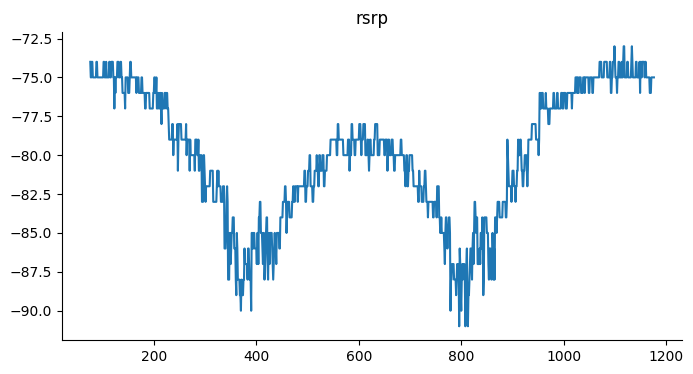

In [16]:
from matplotlib import pyplot as plt
combined_df['rsrp'].plot(kind='line', figsize=(8, 4), title='rsrp')
plt.gca().spines[['top', 'right']].set_visible(False)

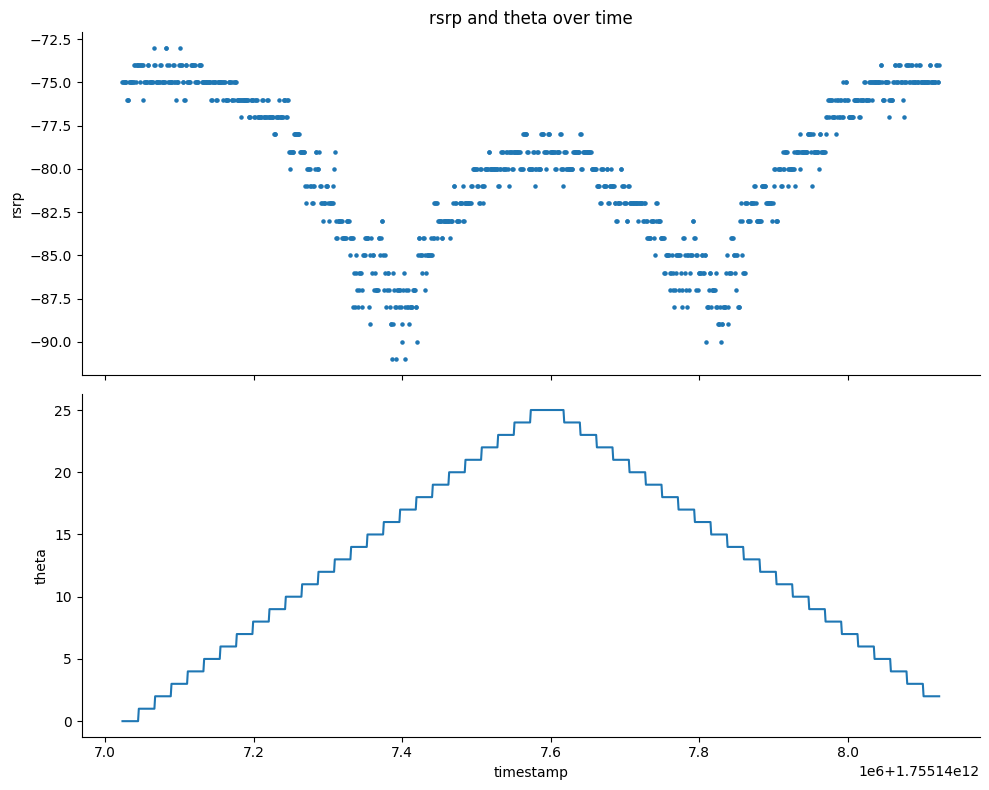

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot rsrp as scatter plot
axes[0].scatter(combined_df['timestamp'], combined_df['rsrp'], s=5)
axes[0].set_ylabel('rsrp')
axes[0].set_title('rsrp and theta over time')
axes[0].spines[['top', 'right']].set_visible(False)


# Plot theta as line plot
axes[1].plot(combined_df['timestamp'], combined_df['theta'])
axes[1].set_ylabel('theta')
axes[1].set_xlabel('timestamp')
axes[1].spines[['top', 'right']].set_visible(False)

# Add vertical lines where theta changes
theta_changes = combined_df['theta'].diff() != 0
change_indices = combined_df[theta_changes].index

for index in change_indices:
    if index % 5 != 0:
        continue
    timestamp = combined_df.loc[index, 'timestamp']
    axes[0].axvline(x=timestamp, color='k', linestyle=':', linewidth=1)
    axes[1].axvline(x=timestamp, color='k', linestyle=':', linewidth=1)

plt.tight_layout()
plt.show()